In [30]:
import pymysql
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import datetime
import re

In [3]:
# matplotlib 한글 출력..
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [4]:
mpl.rcParams['axes.unicode_minus'] = False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams['font.size'] = 14

In [5]:
# 불용어 사전 리스트
def stopwords_list():
    f = open('./data/stopwords-ko.txt',encoding='utf-8')
    word = f.read()
    word = word.split('\n')
    return word
#불용어 및 전처리 작업 리스트
def preprocessing(text):
    sample_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ]', ' ', text)
    sample_text = re.sub(' +', ' ', sample_text)
    tokens = sample_text.split(' ')
    stop_words = stopwords_list()
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [w for w in tokens if len(w) > 1]
    return ' '.join(tokens)
#해당 텍스트 명사만 추출
def rtn_nouns(text):    
    okt = Okt()
    test_text = okt.nouns(text)
    return test_text    
#부정 감정 단어 리스트
def get_nge_words():
    f = open('./data/neg_pol_word.txt',encoding='utf-8')
    nge_words = f.read()
    nge_words = nge_words.split('\n')
    return nge_words
#긍정 감정 단어 리스트
def get_pos_words():
    f = open('./data/pos_pol_word.txt',encoding='utf-8')
    pos_words = f.read()
    pos_words = pos_words.split('\n')
    return pos_words
#해당 텍스트를 긍정,부정,그외 타입으로 나누어
#긍정은 +1,부정은 -1,그외는 0점으로 하여 점수 계산
def text_minning(x):
    news_nge_key = []
    news_pos_key = []
    news_no_key = []
    score = 0    
    #해당 텍스트의 전처리 작업
    test_text = preprocessing(x)    
    #전처리 텍스트의 명사만 추출
    test_text = rtn_nouns(test_text)    
    #부정단어 사전 추출
    nge_words = get_nge_words()    
    #긍정단어 사전 추출
    pos_words = get_pos_words()    
    #해당 텍스트 긍정,부정 작업
    for text in test_text:
        if text in nge_words:
            news_nge_key.append(text)
            score -= 1
        elif text in pos_words:
            news_pos_key.append(text)
            score += 1
        else:
            news_no_key.append(text)
            score += 0    
    nge_keyword = ','.join(news_nge_key)
    pos_keyword = ','.join(news_pos_key)
    no_key_word = ','.join(news_no_key)    
#     점수,부정,긍정,그외단어 순으로 리턴
#     return score,nge_keyword,pos_keyword,no_key_word
    return score

In [6]:
df['score'] = df.content.apply(text_minning)

NameError: name 'df' is not defined

In [60]:
df.to_csv('./2020_kbo_news_minning.csv',encoding='utf-8-sig')

In [7]:
df = pd.read_csv('./data/2020_kbo_news_minning.csv', index_col=0)
df.groupby('team')['score'].sum().sort_values(ascending=False).to_frame()

,score
team,
KT,1316
NC,1285
WO,1043
HT,417
OB,162
SS,109
LT,61
SK,-1
LG,-718


In [8]:
df_player = pd.read_excel('./data/player.xlsx', index_col=0)
word_list = list(df_player['player_name'][df_player.team_2020.notnull()])
word_list.append('')

dict_temp_A = dict()
for i in word_list:
    dict_temp_A[i] = [0]

In [9]:
#word_list = ['구창모', '로하스']
for j in range(len(df)):
    for i in word_list:
        if i in df['content'][j]:
            dict_temp_A[i][0] += df['score'][j]

In [10]:
player_score = pd.DataFrame(dict_temp_A)
player_score = player_score.T.reset_index()
player_score = player_score.sort_values(0,ascending=False)

In [161]:
player_score[1:16]

,index,0
262,조상우,682
122,이정후,623
119,로하스,610
297,구창모,606
223,스트레일리,565
287,김재윤,556
170,최정,460
172,양의지,457
356,오승환,437
328,알칸타라,419


In [159]:
player_score[-15:]

,index,0
148,김태균,-469
201,오선진,-492
151,박용택,-500
180,이재원,-506
203,오지환,-508
158,이용규,-509
130,정은원,-518
206,채은성,-521
167,오재일,-530
129,호잉,-554


In [16]:
df_player_1 = pd.read_excel('./data/player.xlsx', index_col=0)
word_list = list(df_player_1['player_name'][df_player_1.team_2020.notnull()])

dict_temp_B = dict()
for i in word_list:
    dict_temp_B[i] = [0]

In [18]:
team_key = {'두산':'OB', '키움':'WO', 'SK':'SK', 'LG':'LG', 'NC':'NC', 
         'KT':'KT', 'KIA':'HT', '삼성':'SS', '한화':'HH', '롯데':'LT'}
df_player_1 = df_player.drop(df_player[df_player.team_2020.isnull()].index)
df_player_1['team_2020'] = df_player_1['team_2020'].apply(lambda x: team_key[x])

In [19]:
for j in range(len(df)):
    for i in word_list:
        if (i in df['content'][j]):
            if (df['team'][j] == df_player_1['team_2020'][df_player_1.player_name == i].values[0]):
                dict_temp_B[i][0] += df['score'][j]

In [20]:
player_score = pd.DataFrame(dict_temp_B)
player_score = player_score.T.reset_index()
player_score = player_score.sort_values(0,ascending=False)

In [29]:
player_score.columns = ['player_name', 'news_score']
player_score

,player_name,news_score
122,이정후,778
119,로하스,660
50,나성범,545
71,배정대,517
172,양의지,509
...,...,...
148,김태균,-425
38,하주석,-465
348,송은범,-492
332,라이블리,-530


In [27]:
def player_score_add (news_df, data_df, year):
    df_player = pd.read_excel('./data/player.xlsx', index_col=0)
    df_player_list = list(df_player['player_name'][df_player[year].notnull()])
    dict_player = dict()
    for i in df_player_list:
        dict_player[i] = [0]
    team_key = {'두산':'OB', '키움':'WO', 'SK':'SK', 'LG':'LG', 'NC':'NC', 
         'KT':'KT', 'KIA':'HT', '삼성':'SS', '한화':'HH', '롯데':'LT'}
    df_player_1 = df_player.drop(df_player[df_player[year].isnull()].index)
    df_player_1[year] = df_player_1[year].apply(lambda x: team_key[x])
    
    for j in range(len(news_df)):
        for i in df_player_list:
            if (i in news_df['content'][j]):
                if (news_df['team'][j] == df_player_1[year][df_player_1.player_name == i].values[0]):
                    dict_player[i][0] += news_df['score'][j]

    player_score = pd.DataFrame(dict_player)
    player_score = player_score.T.reset_index()
    player_score.columns = ['player_name', 'news_score']
    
    df = pd.merge(data_df, player_score, on='player_name', how='left')
    return df

In [41]:
#for i in range(2016, 2021) :
news_df = pd.read_csv('./data/2020_kbo_news_minning.csv', index_col=0) # 'news_{}.xlsx'.format(i )
data_df = pd.read_excel('./data/kbo_hitter_today_20200722.xlsx', index_col=0) # 'data_{}.xlsx'.format(i)
df_team_rank = pd.read_excel('./data/team_win.xlsx', index_col=0)

In [35]:
# MySQL Connection 연결
conn = pymysql.connect(host='49.247.132.235', user='kbo_db', password='1234', db='kbo_data_db', charset='utf8')
# Connection 으로부터 Cursor 생성
curs = conn.cursor()
sql = '''SELECT * from kbo_pitcher_player;'''   
curs.execute(sql)
rows = curs.fetchall()
df_pit_name = pd.DataFrame(rows)
sql = '''SELECT * from kbo_hitter_player;'''   
curs.execute(sql)
rows = curs.fetchall()
df_hit_name = pd.DataFrame(rows)
conn.close()

In [36]:
df_hit_name.columns=['player_id', 'player_name']
df_2020_hit_m = pd.merge(data_df, df_hit_name, on = 'player_id', how = 'left')
df_2020_hit_m = df_2020_hit_m.dropna()
team_year_rank = df_team_rank[df_team_rank[0] == 2020]
df_2020_hit_m['player_team'] = df_2020_hit_m['player_team'].apply(lambda x: team_year_rank[1][x == team_year_rank[2]].values[0])
df_2020_hit_m = df_2020_hit_m.drop(['player_id', 'player_year'], axis=1)
df_2020_hit_m = df_2020_hit_m.apply(lambda x: x.replace('-','0')) 

In [37]:
temp_df_1 = player_score_add(news_df ,df_2020_hit_m ,'team_2020')# 'team_{}'.format(i)

In [40]:
temp_df_1.to_excel('./data/감성분석_ex.xlsx')

<BarContainer object of 387 artists>

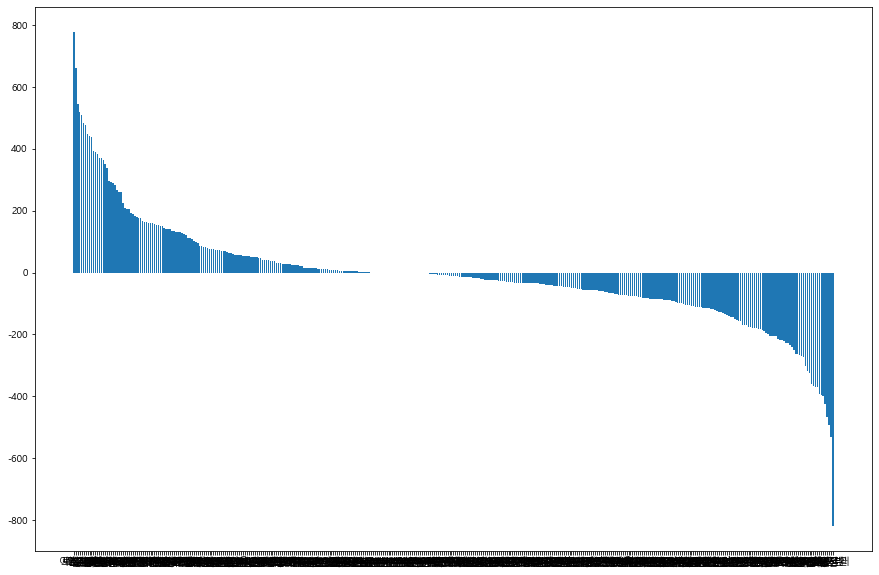

In [262]:
plt.figure(figsize=(15,10))
plt.bar(list(player_score.set_index('index').index), list(player_score.set_index('index')[0].values))